# Preamble

In [19]:
libraries = c("dplyr","magrittr","tidyr","ggplot2","gridExtra","RColorBrewer") #,"zoo","directlabels")
for(x in libraries) {
    library(x,character.only=TRUE,warn.conflicts=FALSE) }

# options(jupyter.plot_mimetypes = "image/svg+xml") 
clrs = brewer.pal(8,"Set1")

windowsFonts(Times = windowsFont("Times New Roman"))
base_sz = 12 # base_size parameter

'%&%' = function(x,y)paste0(x,y)
'%!in%' = function(x,y)!('%in%'(x,y))
    
# Initialization of array for recorded plots
plot_point_sizes = c(); nm = c(); plot_point_sizes = list()

# Sensitivity analysis for $\mu$ and $\bar\mu$

In [20]:
"../figures/draft/final-sensitivity_mu.csv" %>% 
    read.csv %>%
    select(-matches("err|sw_end|univ_point")) %>%
    arrange(T,Tbar) -> df
#     group_by(T) %>% mutate(y = 1:n()) %>% ungroup %>%
#     group_by(Tbar) %>% mutate(x = 1:n()) %>% ungroup 
df %>% head

index,b,d,chi,c,alpha,theta,kappa,L,T,Tbar,mu,mubar,sw_start_x,outcome
1,0.14,0.13,0.3,0.04,0.3,0.45,40,0.2,4,4,0.25,0.2500000,0.8285258,0.34441069
2,0.14,0.13,0.3,0.02,0.3,0.45,40,0.2,4,4,0.25,0.2500000,0.8144312,1.25257668
3,0.14,0.13,0.3,0.06,0.3,0.45,40,0.2,4,4,0.25,0.2500000,0.8420269,0.08841873
1,0.14,0.13,0.3,0.04,0.3,0.45,40,0.2,4,6,0.25,0.1666667,0.8703072,0.96379816
2,0.14,0.13,0.3,0.02,0.3,0.45,40,0.2,4,6,0.25,0.1666667,0.8574741,3.94606868
3,0.14,0.13,0.3,0.06,0.3,0.45,40,0.2,4,6,0.25,0.1666667,0.8821662,0.21892312


## Main figure for $c=4\%$

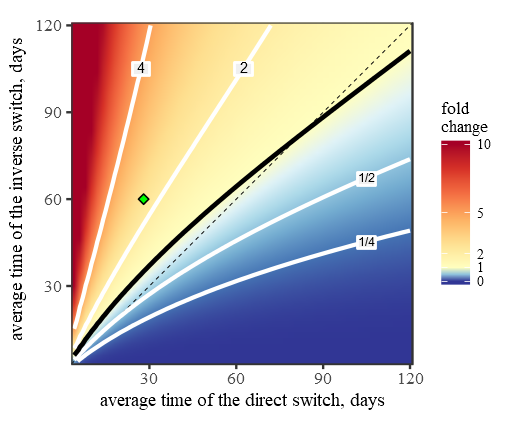

In [21]:
cs = c(4.25,3.6)
options(repr.plot.width=cs[1],repr.plot.height=cs[2])

outcome_threshold = 10
nbin=20; w=3; h=2.2
cl_rc = brewer.pal(8,"Greys")[2]
cl_pt = "green" #brewer.pal(8,"Greens")[3]
vjst = .4
hjst = .5
df %>% filter(index==1) %>%
    mutate(outcome_cut=if_else(outcome>=outcome_threshold,outcome_threshold,outcome)) %>%
    ggplot(aes(x=T,y=Tbar,fill=outcome_cut)) + 
        geom_raster(interpolate=T) +
        geom_abline(slope=1,size=.2,linetype="dashed") + 
        stat_contour(aes(z=outcome),breaks=c(.2,.5,2,5), color=brewer.pal(8,"Greys")[1], size=.9) +
        stat_contour(aes(z=outcome),breaks=c(1), color="black", size=1) +
        scale_x_continuous(expand=c(0,0)) + scale_y_continuous(expand=c(0,0)) +
        scale_fill_gradientn(limits=c(0,outcome_threshold),
                             colours=rev(brewer.pal(11,"RdYlBu")),
                             values=c(seq(0,1,length.out=6),seq(1,outcome_threshold,length.out=6)[-1])/outcome_threshold,
                             breaks=c(0,1,2,outcome_threshold/2,outcome_threshold),
                             labels=c(0,1,2,outcome_threshold/2,outcome_threshold),
                             name="fold\nchange") +     
        xlab("average time of the direct switch, days") +
        ylab("average time of the inverse switch, days") +
        coord_equal() +
        theme_bw(base_size=base_sz,base_family='Times') +
#         guides(fill=FALSE) +
        annotate("point",x=28,y=60,shape=23,fill=cl_pt,size=2) +
        annotate("rect",xmin=27-w,xmax=27+w,ymin=105-h,ymax=105+h,fill=cl_rc,color="white",size=.6) +
        annotate("text",x=27,y=105,label="4",size=3,vjust=vjst,hjust=hjst) +
        annotate("rect",xmin=62.5-w,xmax=62.5+w,ymin=105-h,ymax=105+h,fill=cl_rc,color="white",size=.6) +
        annotate("text",x=62.5,y=105,label="2",size=3,vjust=vjst,hjust=hjst) +
        annotate("rect",xmin=105-w,xmax=105+w,ymin=67-h,ymax=67+h,fill=cl_rc,color="white",size=.6) +
        annotate("text",x=105,y=67,label="1/2",size=2.5,vjust=vjst,hjust=hjst) +
        annotate("rect",xmin=105-w,xmax=105+w,ymin=45-h,ymax=45+h,fill=cl_rc,color="white",size=.6) +
        annotate("text",x=105,y=45,label="1/4",size=2.5,vjust=vjst,hjust=hjst) +
        theme(legend.title=element_text(size=10,vjust=10),legend.text=element_text(size=8),
              axis.title=element_text(size=11)) -> p1
p1

ggsave(plot=p1,width=cs[1],height=cs[2],filename="../figures/draft/Fig6-A.pdf",useDingbats=FALSE)

## Two other supplementary figures for $c=2\%$ and $c=6\%$

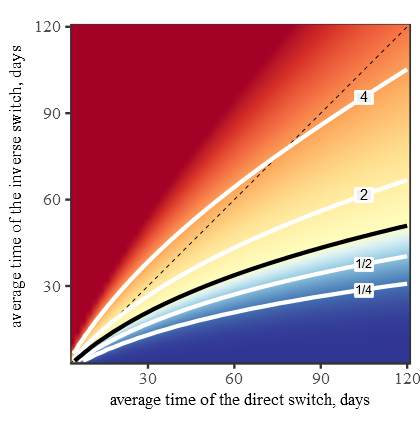

In [22]:
cs = c(3.5,3.6)
options(repr.plot.width=cs[1],repr.plot.height=cs[2])

outcome_threshold = 10
nbin=20; w=3; h=2.2
cl_rc = brewer.pal(8,"Greys")[2]
cl_pt = "green" #brewer.pal(8,"Greens")[3]
vjst = .4
hjst = .5
df %>% filter(index==2) %>%
    mutate(outcome_cut=if_else(outcome>=outcome_threshold,outcome_threshold,outcome)) %>%
    ggplot(aes(x=T,y=Tbar,fill=outcome_cut)) + 
        geom_raster(interpolate=T) +
        geom_abline(slope=1,size=.2,linetype="dashed") + 
        stat_contour(aes(z=outcome),breaks=c(.2,.5,2,5), color=brewer.pal(8,"Greys")[1], size=.9) +
        stat_contour(aes(z=outcome),breaks=c(1), color="black", size=.9) +
        scale_x_continuous(expand=c(0,0)) + scale_y_continuous(expand=c(0,0)) +
        scale_fill_gradientn(limits=c(0,outcome_threshold),
                             colours=rev(brewer.pal(11,"RdYlBu")),
                             values=c(seq(0,1,length.out=6),seq(1,outcome_threshold,length.out=6)[-1])/outcome_threshold,
                             breaks=c(1e-4,1,2,outcome_threshold/2,outcome_threshold),
                             labels=c(0,1,2,outcome_threshold/2,outcome_threshold),
                             name="fold\nchange") + 
        xlab("average time of the direct switch, days") +
        ylab("average time of the inverse switch, days") +
        coord_equal() + guides(fill=FALSE) +
        theme_bw(base_size=base_sz,base_family='Times') +
        annotate("rect",xmin=105-w,xmax=105+w,ymin=95.5-h,ymax=95.5+h,fill=cl_rc,color="white",size=.6) +
        annotate("text",x=105,y=95.5,label="4",size=3,vjust=vjst,hjust=hjst) +
        annotate("rect",xmin=105-w,xmax=105+w,ymin=61.5-h,ymax=61.5+h,fill=cl_rc,color="white",size=.6) +
        annotate("text",x=105,y=61.5,label="2",size=3,vjust=vjst,hjust=hjst) +
        annotate("rect",xmin=105-w,xmax=105+w,ymin=37.5-h,ymax=37.5+h,fill=cl_rc,color="white",size=.6) +
        annotate("text",x=105,y=37.5,label="1/2",size=2.5,vjust=vjst,hjust=hjst) +
        annotate("rect",xmin=105-w,xmax=105+w,ymin=28.5-h,ymax=28.5+h,fill=cl_rc,color="white",size=.6) +
        annotate("text",x=105,y=28.5,label="1/4",size=2.5,vjust=vjst,hjust=hjst) +
        theme(legend.title=element_text(size=10,vjust=10),legend.text=element_text(size=8),
              axis.title=element_text(size=10)) -> p2
p2

ggsave(plot=p2,width=cs[1],height=cs[2],filename="../figures/draft/Fig6-B.pdf",useDingbats=FALSE)

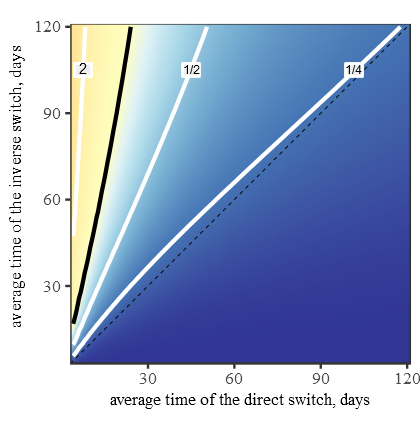

In [23]:
outcome_threshold = 10
nbin=20; w=3; h=2.2
cl_rc = brewer.pal(8,"Greys")[2]
cl_pt = "green" #brewer.pal(8,"Greens")[3]
vjst = .4
hjst = .5
df %>% filter(index==3) %>%
    mutate(outcome_cut=if_else(outcome>=outcome_threshold,outcome_threshold,outcome)) %>%
    ggplot(aes(x=T,y=Tbar,fill=outcome_cut)) + 
        geom_raster(interpolate=T) +
        geom_abline(slope=1,size=.2,linetype="dashed") + 
        stat_contour(aes(z=outcome),breaks=c(.2,.5,2,5), color=brewer.pal(8,"Greys")[1], size=.9) +
        stat_contour(aes(z=outcome),breaks=c(1), color="black", size=.9) +
        scale_fill_gradientn(limits=c(0,outcome_threshold),
                             colours=rev(brewer.pal(11,"RdYlBu")),
                             values=c(seq(0,1,length.out=6),seq(1,outcome_threshold,length.out=6)[-1])/outcome_threshold,
                             breaks=c(1e-4,1,2,outcome_threshold/2,outcome_threshold),
                             labels=c(0,1,2,outcome_threshold/2,outcome_threshold),
                             name="fold\nchange") + 
        scale_x_continuous(expand=c(0,0)) + scale_y_continuous(expand=c(0,0)) +
        theme_bw(base_size=base_sz,base_family='Times') +
        xlab("average time of the direct switch, days") +
        ylab("average time of the inverse switch, days") +
#         annotate("rect",xmin=27-w,xmax=27+w,ymin=105-h,ymax=105+h,fill=cl_rc,color="white",size=.6) +
#         annotate("text",x=27,y=105,label="4",size=3,vjust=vjst,hjust=hjst) +
        annotate("rect",xmin=7.5-w,xmax=7.5+w,ymin=105-h,ymax=105+h,fill=cl_rc,color="white",size=.6) +
        annotate("text",x=7.5,y=105,label="2",size=3,vjust=vjst,hjust=hjst) +
        annotate("rect",xmin=45-w,xmax=45+w,ymin=105-h,ymax=105+h,fill=cl_rc,color="white",size=.6) +
        annotate("text",x=45,y=105,label="1/2",size=2.5,vjust=vjst,hjust=hjst) +
        annotate("rect",xmin=101.5-w,xmax=101.5+w,ymin=105-h,ymax=105+h,fill=cl_rc,color="white",size=.6) +
        annotate("text",x=101.5,y=105,label="1/4",size=2.5,vjust=vjst,hjust=hjst) +
        coord_equal() + guides(fill=FALSE) +
        theme(legend.title=element_text(size=10,vjust=10),legend.text=element_text(size=8),
              axis.title=element_text(size=10)) -> p3
p3

ggsave(plot=p3,width=cs[1],height=cs[2],filename="../figures/draft/Fig6-C.pdf",useDingbats=FALSE)

# Change in optimal ratio for universal line

In [35]:
"../figures/draft/final-sensitivity_mu.csv" %>% 
    read.csv %>%
    filter(index==1) %>%
    select(-matches("err|outcome|_t")) %>%
    arrange(T,Tbar) -> df
#     group_by(T) %>% mutate(y = 1:n()) %>% ungroup %>%
#     group_by(Tbar) %>% mutate(x = 1:n()) %>% ungroup 
df %>% head

index,b,d,chi,c,alpha,theta,kappa,L,T,Tbar,mu,mubar,sw_start_x,sw_end_x,univ_point_x
1,0.14,0.13,0.3,0.04,0.3,0.45,40,0.2,4,4,0.25,0.25000000,0.8285258,0.6409270,0.6409271
1,0.14,0.13,0.3,0.04,0.3,0.45,40,0.2,4,6,0.25,0.16666667,0.8703072,0.7015927,0.7016175
1,0.14,0.13,0.3,0.04,0.3,0.45,40,0.2,4,8,0.25,0.12500000,0.8951411,0.7427805,0.7405934
1,0.14,0.13,0.3,0.04,0.3,0.45,40,0.2,4,10,0.25,0.10000000,0.9117613,0.7731823,0.7741108
1,0.14,0.13,0.3,0.04,0.3,0.45,40,0.2,4,12,0.25,0.08333333,0.9237365,0.7967160,0.7967384
1,0.14,0.13,0.3,0.04,0.3,0.45,40,0.2,4,14,0.25,0.07142857,0.9327913,0.8156015,0.8157794


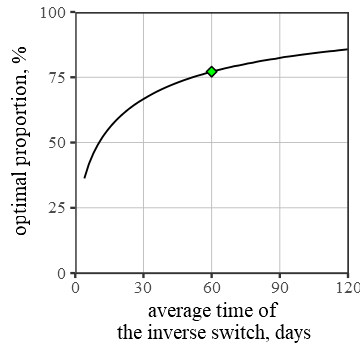

In [85]:
cs = c(3,3)
options(repr.plot.width=cs[1],repr.plot.height=cs[2])

Tbs = 28; Tbarbs = 60
baseline_values = filter(df,T==Tbs&Tbar==Tbarbs)
df %>%
    filter(T==Tbs) %>%
    ggplot(aes(x=Tbar)) +
        geom_line(aes(y=sw_end_x),size=.4) +
        coord_cartesian(expand=0.0,ylim=c(0,1),xlim=c(0,120)) +
        xlab("average time of\n the inverse switch, days") + ylab("optimal proportion, %") +
        theme_bw(base_size=base_sz,base_family='Times') + 
        theme(
            panel.grid.major = element_line(colour="grey",size=.2), 
            panel.grid.minor = element_blank(),
            plot.margin=unit(c(.5,.5,.75,.5),"lines")) + 
        scale_y_continuous(breaks=seq(0,1,length.out=5),labels=100*seq(0,1,length.out=5)) +
        annotate("point",x=Tbarbs,y=baseline_values$sw_end_x,shape=23,fill=cl_pt,size=2) -> p

p

ggsave(plot=p,width=cs[1],height=cs[2],filename="../figures/draft/FigS7-B.pdf",useDingbats=FALSE)

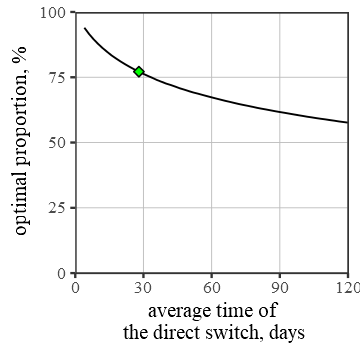

In [86]:
df %>%
    filter(Tbar==Tbarbs) %>%
    ggplot(aes(x=T)) +
        geom_line(aes(y=sw_end_x),size=.4) +
        coord_cartesian(expand=0.0,ylim=c(0,1),xlim=c(0,120)) +
        xlab("average time of\n the direct switch, days") + ylab("optimal proportion, %") +
        theme_bw(base_size=base_sz,base_family='Times') + 
        theme(
            panel.grid.major = element_line(colour="grey",size=.2), 
            panel.grid.minor = element_blank(),
            plot.margin=unit(c(.5,.5,.75,.5),"lines")) + 
        scale_y_continuous(breaks=seq(0,1,length.out=5),labels=100*seq(0,1,length.out=5)) +
        annotate("point",x=Tbs,y=baseline_values$sw_end_x,shape=23,fill=cl_pt,size=2) -> p

p

ggsave(plot=p,width=cs[1],height=cs[2],filename="../figures/draft/FigS7-A.pdf",useDingbats=FALSE)

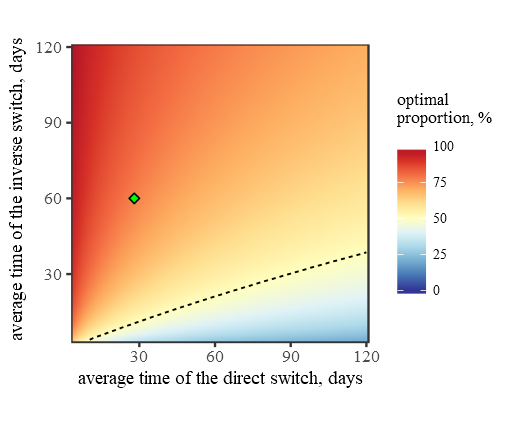

In [90]:
cs = c(4.25,3.6)
options(repr.plot.width=cs[1],repr.plot.height=cs[2])
nbin=20; w=3; h=2.2
cl_rc = brewer.pal(8,"Greys")[2]
cl_pt = "green" #brewer.pal(8,"Greens")[3]
vjst = .4
hjst = .5
df %>% filter(index==1) %>%
    ggplot(aes(x=T,y=Tbar,fill=sw_end_x)) + 
        geom_raster(interpolate=T) +
        stat_contour(aes(z=sw_end_x),breaks=c(.5), color="black", size=.4, linetype="dashed") +
        scale_x_continuous(expand=c(0,0)) + scale_y_continuous(expand=c(0,0)) +
        scale_fill_gradientn(limits=c(0,1),
                             colours=rev(brewer.pal(11,"RdYlBu")),
                             values=seq(0,1,length.out=11),
                             breaks=seq(0,1,length.out=5),
                             labels=100*seq(0,1,length.out=5),
                             name="optimal\nproportion, %\n") +     
        xlab("average time of the direct switch, days") +
        ylab("average time of the inverse switch, days") +
        coord_equal() +
        theme_bw(base_size=base_sz,base_family='Times') +
#         guides(fill=FALSE) +
        annotate("point",x=Tbs,y=Tbarbs,shape=23,fill=cl_pt,size=2) +
        theme(legend.title=element_text(size=10,vjust=10),legend.text=element_text(size=8),
              axis.title=element_text(size=11)) -> p

p

ggsave(plot=p,width=cs[1],height=cs[2],filename="../figures/draft/FigS7-C.pdf",useDingbats=FALSE)

# Varying other parameters

## Cost of resistance

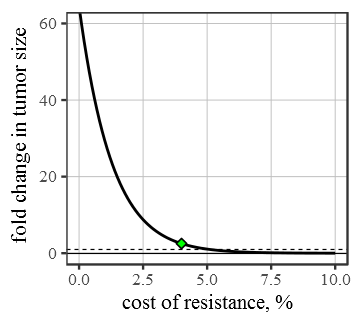

In [6]:
"../figures/draft/final-sensitivity_c.csv" %>% 
    read.csv(colClasses='numeric') %>%
    select(-matches("err|sw_end|univ_point")) %>%
    arrange(c) -> df_

cs = c(3,2.75)
options(repr.plot.width=cs[1],repr.plot.height=cs[2])

outcome_bs = filter(df_,c==.04)$outcome

pC = df_ %>%
    gather(Variable,Value,-outcome) %>% mutate(Value = Value*100) %>%
    ggplot(aes(x=Value,y=outcome)) +
        geom_hline(yintercept=1,size=.25,color="black",linetype="dashed") +
        geom_hline(yintercept=0,size=.25,color="black",linetype="solid") +
        geom_line(size=.6) +
        coord_cartesian(expand=0.01,ylim=c(0,60)) +
        ylab("fold change in tumor size") + xlab("cost of resistance, %") +
        theme_bw(base_size=base_sz,base_family='Times') + 
        theme(
            panel.grid.major = element_line(colour="grey",size=.2), 
            panel.grid.minor = element_blank(),
            plot.margin=unit(c(.5,.5,.75,.5),"lines")) + 
        annotate("point",x=4,y=outcome_bs,shape=23,fill=cl_pt,size=2)

pC

# Sensitivity on $\alpha$

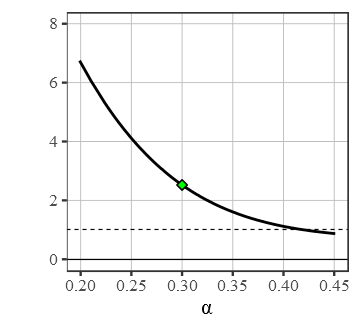

In [8]:
"../figures/draft/final-sensitivity_alpha.csv" %>% 
    read.csv(colClasses='numeric') %>%
    select(-matches("err|sw_end|univ_point")) %>%
    arrange(alpha) -> df_

cs = c(3,2.75)
options(repr.plot.width=cs[1],repr.plot.height=cs[2])

pAlpha = df_ %>% gather(Variable,Value,-outcome) %>%
    ggplot(aes(x=Value,y=outcome)) + 
        geom_hline(yintercept=1,size=.25,color="black",linetype="dashed") +
        geom_hline(yintercept=0,size=.25,color="black",linetype="solid") +
        geom_line(size=.6) +
        coord_cartesian(expand=0.01,ylim=c(0,8)) +
        ylab("fold change in tumor size") + xlab(expression(alpha))  +
        theme_bw(base_size=base_sz,base_family='Times') + 
        theme(
            axis.title.y = element_text(colour=NA),
            panel.grid.major = element_line(colour="grey",size=.2), 
            panel.grid.minor = element_blank(),
            plot.margin=unit(c(.5,.5,.75,.9),"lines")) + 
        annotate("point",x=.3,y=outcome_bs,shape=23,fill=cl_pt,size=2)
pAlpha

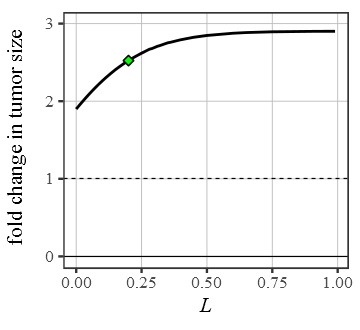

In [10]:
"../figures/draft/final-sensitivity_L.csv" %>% 
    read.csv(colClasses='numeric') %>%
    select(-matches("err|sw_end|univ_point")) %>%
    arrange(L) -> df_

cs = c(3,2.75)
options(repr.plot.width=cs[1],repr.plot.height=cs[2])

pL = df_ %>% gather(Variable,Value,-outcome) %>%
    ggplot(aes(x=Value,y=outcome)) + 
        geom_hline(yintercept=1,size=.25,color="black",linetype="dashed") +
        geom_hline(yintercept=0,size=.25,color="black",linetype="solid") +
        geom_line(size=.6) +
        coord_cartesian(expand=0.01,ylim=c(0,3)) +
        ylab("fold change in tumor size") + xlab(expression(italic(L))) +
        theme_bw(base_size=base_sz,base_family='Times') + 
        theme(
            axis.title.y = element_text(vjust=4),
            panel.grid.major = element_line(colour="grey",size=.2), 
            panel.grid.minor = element_blank(),
            plot.margin=unit(c(.5,.5,.75,.75),"lines")) + 
        annotate("point",x=.2,y=outcome_bs,shape=23,fill=cl_pt,size=2)

pL

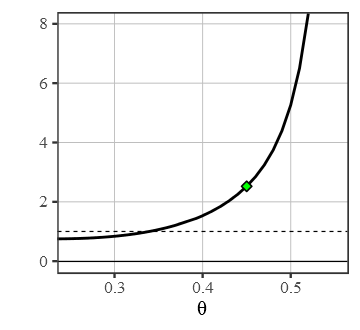

In [11]:
"../figures/draft/final-sensitivity_theta.csv" %>% 
    read.csv(colClasses='numeric') %>%
    select(-matches("err|sw_end|univ_point")) %>%
    arrange(theta) -> df_

cs = c(3,2.75)
options(repr.plot.width=cs[1],repr.plot.height=cs[2])

pTheta = df_ %>% gather(Variable,Value,-outcome) %>%
    ggplot(aes(x=Value,y=outcome)) + 
        geom_hline(yintercept=1,size=.25,color="black",linetype="dashed") +
        geom_hline(yintercept=0,size=.25,color="black",linetype="solid") +
        geom_line(size=.6) +
        coord_cartesian(expand=0.01,ylim=c(0,8),xlim=c(.25,.55)) +
        ylab("fold change in tumor size") + xlab(expression(theta)) +
        theme_bw(base_size=base_sz,base_family='Times') + 
        theme(
            axis.title.y = element_text(colour=NA),
            panel.grid.major = element_line(colour="grey",size=.2), 
            panel.grid.minor = element_blank(),
            plot.margin=unit(c(.5,.5,.75,.5),"lines")) + 
        annotate("point",x=.45,y=outcome_bs,shape=23,fill=cl_pt,size=2)

pTheta

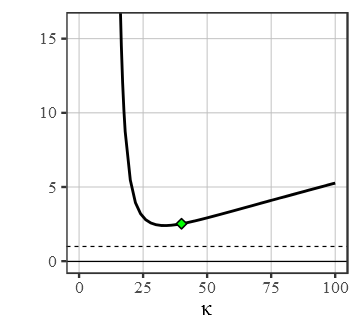

In [12]:
"../figures/draft/final-sensitivity_kappa.csv" %>% 
    read.csv(colClasses='numeric') %>%
    select(-matches("err|sw_end|univ_point")) %>%
    arrange(kappa) -> df_

cs = c(3,2.75)
options(repr.plot.width=cs[1],repr.plot.height=cs[2])

pKappa = df_ %>% gather(Variable,Value,-outcome) %>%
    ggplot(aes(x=Value,y=outcome)) +
        geom_hline(yintercept=1,size=.25,color="black",linetype="dashed") +
        geom_hline(yintercept=0,size=.25,color="black",linetype="solid") +
        geom_line(size=.6) +
        coord_cartesian(expand=0.01,ylim=c(0,16),xlim=c(0,100)) +
        ylab("fold change in tumor size") + xlab(expression(kappa)) +
        theme_bw(base_size=base_sz,base_family='Times') + 
        theme(
            axis.title.y = element_text(colour=NA),
            panel.grid.major = element_line(colour="grey",size=.2), 
            panel.grid.minor = element_blank(),
            plot.margin=unit(c(.5,.5,.75,.5),"lines")) + 
        annotate("point",x=40,y=outcome_bs,shape=23,fill=cl_pt,size=2)

pKappa

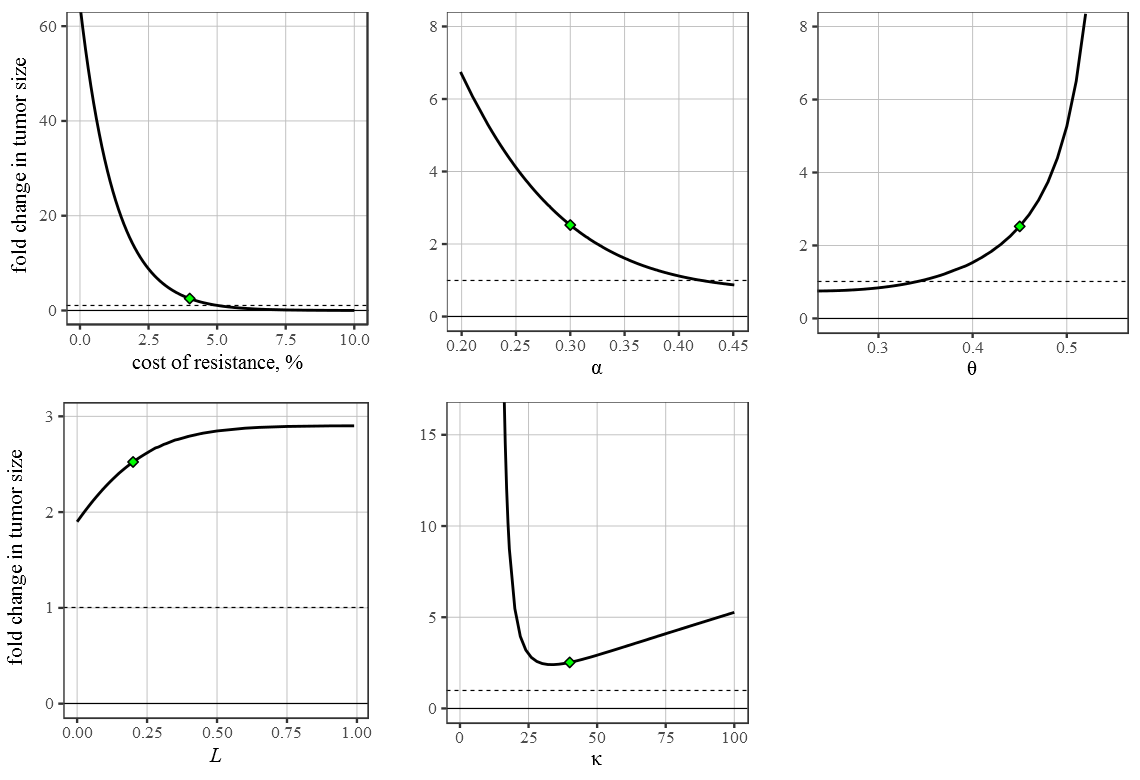

In [13]:
cs = c(9.5,6.5)
options(repr.plot.width=cs[1],repr.plot.height=cs[2]) 
pFinal = grid.arrange(ggplotGrob(pC), ggplotGrob(pAlpha), ggplotGrob(pTheta), 
             ggplotGrob(pL), ggplotGrob(pKappa), nrow=2)

ggsave(plot=pFinal,height=cs[2],width=cs[1],dpi=200,filename="../figures/FigS8.pdf",useDingbats=FALSE)